I think my reflections off the mirror may be incorrect so FUCK ME.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from RayTraceFun_forDet import *
from PossibleFunctionsDet import *
from BackgroundDet import *
from random import uniform
import random
import matplotlib
#%matplotlib auto

In [2]:
'''find intersection points of given ray and the mirror. (ignoring missing rays)'''         
def IntM2(Ray,coeffmirr,originmirr):
    if Ray is None:
        return
    p = Ray[2]
    v = Ray[3]
    Ray_M = []
    Ray_M.append(Ray[0])
    Ray_M.append(Ray[1])
    intpoint = PLINTyS(originmirr[1],p,v)
    if SRM(intpoint,coeffmirr,originmirr) == True:
        Ray_M.append(intpoint)
        VectLNorm = N(v)
        PNorm = [0,-1,0] #from definition of mirror (check sign what)
        VectReflect = VectLNorm -2*N(PNorm)*(np.dot(VectLNorm,N(PNorm)))
        Ray_M.append(VectReflect) #change to reflected
        Ray_M.append(Ray[4])
        return Ray_M
    else:
        return

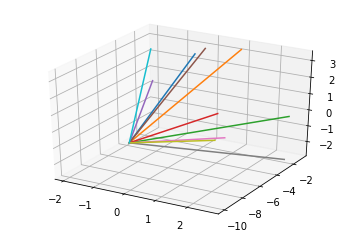

In [13]:
sourcepointorigin = [0.,-10.,0.] #LOCAL 
sourcethet = [np.pi/2,0.,0.] #SHOT STRAIGHT TOWARDS Y = 0
sourcepoints = specsource(0.00,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(10,sourcepoints, sourcethet,origin10)
pl3dsurf = pl.figure().gca(projection = '3d')

for i in range(10):
    R = Rays[i]
    x,y,z = ML(R[2],R[3],10)
    pl3dsurf.plot(x,y,z)
pl.show()
    

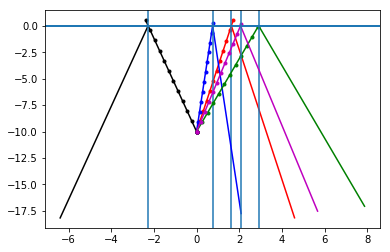

In [41]:
sourcepointorigin = [0.,-10.,0.] #LOCAL 
sourcethet = [np.pi/2,0.,0.] #SHOT STRAIGHT TOWARDS Y = 0
sourcepoints = specsource(0.00,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(10,sourcepoints, sourcethet,origin10)

for i in range(5):
    R = Rays[i]
    #R[3] = [1.,1.,0]
    x,y,z = ML(R[2],R[3],12)
    pl.plot(x,y,color="rbgkm"[i], marker = '.')
    RR = IntM2(R,coeffmirr,[0,0,0])
    x1,y1,z1 =ML(RR[2],RR[3],20)
    pl.plot(x1,y1,color="rbgkm"[i])
    pl.axhline(y = 0.)
    pl.axvline(x = RR[2][0])
pl.show()
    

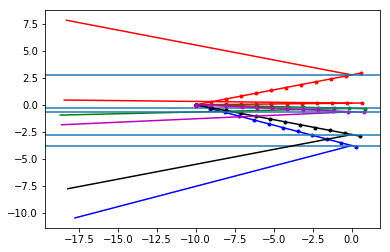

In [51]:
sourcepointorigin = [0.,-10.,0.] #LOCAL 
sourcethet = [np.pi/2,0.,0.] #SHOT STRAIGHT TOWARDS Y = 0
sourcepoints = specsource(0.00,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(10,sourcepoints, sourcethet,origin10)

#pl3dsurf = pl.figure().gca(projection = '3d')
for i in range(5):
    R = Rays[i]
    #R[3] = [1.,1.,0]
    x,y,z = ML(R[2],R[3],12)
    pl.plot(y,z,color="rbgkm"[i], marker = '.')
    RR = IntM2(R,coeffmirr,[0,0,0])
    x1,y1,z1 =ML(RR[2],RR[3],20)
    pl.plot(y1,z1,color="rbgkm"[i])
    #pl.axhline(y = 0.) # z = 0
    pl.axhline(y = RR[2][2])
pl.show()
# X by Z looks weird????

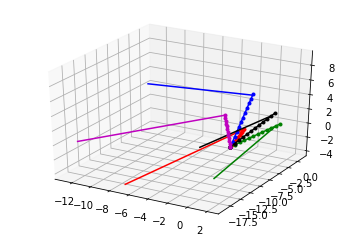

In [52]:
sourcepointorigin = [0.,-10.,0.] #LOCAL 
sourcethet = [np.pi/2,0.,0.] #SHOT STRAIGHT TOWARDS Y = 0
sourcepoints = specsource(0.00,sourcepointorigin,sourcethet) #LOCAL
Rays = FSRay(10,sourcepoints, sourcethet,origin10)

pl3dsurf = pl.figure().gca(projection = '3d')
for i in range(5):
    R = Rays[i]
    #R[3] = [1.,1.,0]
    x,y,z = ML(R[2],R[3],12)
    pl3dsurf.plot(x,y,z,color="rbgkm"[i], marker = '.')
    RR = IntM2(R,coeffmirr,[0,0,0])
    x1,y1,z1 =ML(RR[2],RR[3],20)
    pl3dsurf.plot(x1,y1,z1,color="rbgkm"[i])
    #pl.axhline(y = 0.) # z = 0
    #pl.axhline(y = RR[2][2])
pl.show()
# sooo... this LOOKS like it's working correctly
# now test using the MIRROR AND RAYS FROM THE FTS MODEL

now using the rays from the FTS model

In [53]:
def TTTTioPART1(Ri,p1,p2,p3,p4):
    Ray1 = ReflEll(Ri,thet10,origin10,coeffellipse7,center10,range10)
    Ray_TP1 = IntPolT2(Ray1,coeffpolar,originpolar1,p1) #P1
    Ray_E8 = ReflEll(Ray_TP1,thet6,origin8,coeffellipse56,center8,range8) #E8
    Ray_TP2 = IntPolT2(Ray_E8,coeffpolar,originpolar2,p2) #P2
    Ray_E3 = ReflEll(Ray_TP2,thet,origin3,coeffellipse,center3,range3) #E3
    return Ray_E3

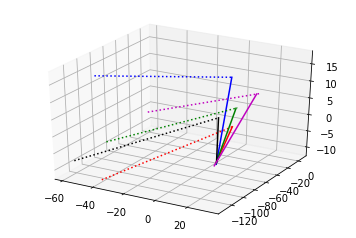

In [73]:
sourcepointorigin = [-160.375,-113.,-80.0] #LOCAL 
sourcethet = [0.,0.,0.] #SHOT STRAIGHT UP
sourcepoints = specsource(0.00,sourcepointorigin,sourcethet)
Rays = FSRay(10,sourcepoints, sourcethet,origin10)

pl3dsurf = pl.figure().gca(projection = '3d')
j = 0
for i in range(10):
    Ri = Rays[i]
    R = TTTTioPART1(Ri,p1,p2,p3,p4)
    if R is not None:
        x,y,z = ML(R[2],R[3],135)
        pl3dsurf.plot(x,y,z, color="rbgkmrbgkm"[j],linestyle = ':')
        RR = IntM2(R,coeffmirr,[0,0,0])
        x1,y1,z1 =ML(RR[2],RR[3],135)
        pl3dsurf.plot(x1,y1,z1,color="rbgkmrbgkm"[j])
        j = j+1
    #pl.axhline(y = 0.) # z = 0
    #pl.axhline(y = RR[2][2])
pl.show()
# sooo... it IS going from PSREAD to FOCUSED so... i think what i'm doing is correct 
#but im confused now about how it DOESN'T spread at the end 